In [2]:
import os
import csv
import pandas as pd
import numpy as np

import datetime
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import squarify

from sklearn import model_selection, preprocessing, metrics
plt.style.use('fivethirtyeight')

print(os.getcwd())
print(os.listdir("../"))

/Users/divyam/Dev/Data_Science/DSF_Project/AcademicPaperRanking
['AcademicPaperRanking', '.DS_Store', 'dblp.csv', 'sys_argv.py', 'acm.csv', 'a', '2018_line_delimited.json', 'dblp.txt', 'aminer_papers_0.zip', 'acm.txt', '2018_data.json', 'aminer_papers_0']


In [3]:
#load dataframe from csv
df = pd.read_csv("../acm.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385066 entries, 0 to 2385065
Data columns (total 7 columns):
PaperTitle           object
Authors              object
Year                 float64
Publication_Venue    object
Index_Id             int64
References_Id        object
Abstract             object
dtypes: float64(1), int64(1), object(5)
memory usage: 127.4+ MB


In [5]:
df.shape

(2385066, 7)

In [6]:
df[df["Index_Id"] == 289023]

,PaperTitle,Authors,Year,Publication_Venue,Index_Id,References_Id,Abstract
289022,Shifting Graphs and Their Applications,"Nicholas Pippenger, Leslie G. Valiant",1976.0,Journal of the ACM (JACM),289023,:252607:288548:289037:289188:599901:600048:669...,Graphs that in a certain precise sense are ric...


***count_reference*** represents the number of times particular paper got referred in our dataset

In [7]:
df["count_reference"] = 0

In [8]:
df.isna().sum()

PaperTitle                46
Authors               151075
Year                    8428
Publication_Venue        139
Index_Id                   0
References_Id        1344739
Abstract              713788
count_reference            0
dtype: int64

In [9]:
df = df.dropna(axis=0,how='any')

In [10]:
df.isna().sum()

PaperTitle           0
Authors              0
Year                 0
Publication_Venue    0
Index_Id             0
References_Id        0
Abstract             0
count_reference      0
dtype: int64

In [11]:
df.shape

(977377, 8)

In [12]:
df["Authors"].value_counts()

-, -, -                                                                                                                          345
-, -                                                                                                                             243
-, -, -, -                                                                                                                       239
-, -, -, -, -                                                                                                                    145
Irith Pomeranz, Sudhakar M. Reddy                                                                                                 91
-                                                                                                                                 88
Abdul-Majid Wazwaz                                                                                                                81
Ronald R. Yager                                                      

In [13]:
temp_df = df.loc[df['Authors'].astype(str).str.startswith('-')]

In [15]:
temp_df.shape

(1144, 8)

In [16]:
df = df.drop(df[df['Authors'].astype(str).str.startswith('-')].index)

In [17]:
df.shape

(976233, 8)

####YEAR

In [18]:
df["Year"] = df["Year"].fillna(0)
df["Year"] = df["Year"].astype(int)

**Rows with NaN year**

In [19]:
df[df["Year"] == 0]

,PaperTitle,Authors,Year,Publication_Venue,Index_Id,References_Id,Abstract,count_reference


***Year of publication distribution in the data***

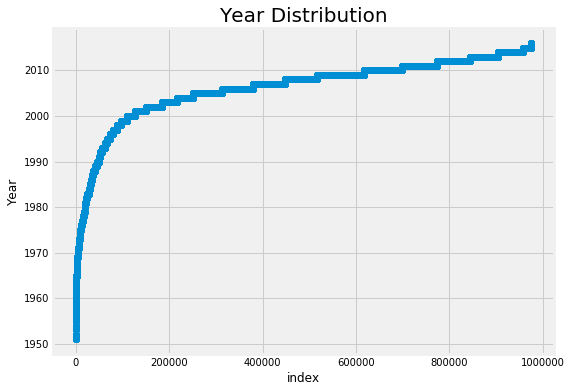

In [14]:
ydf = df[df["Year"]!=0]
plt.figure(figsize=(8,6))
plt.scatter(range(ydf.shape[0]), np.sort(ydf["Year"].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.title("Year Distribution", fontsize=20) 
plt.show()

In [21]:
print(df.dtypes)

PaperTitle           object
Authors              object
Year                  int64
Publication_Venue    object
Index_Id              int64
References_Id        object
Abstract             object
count_reference       int64
dtype: object


In [22]:
df["Index_Id"].unique()
print(any(df['Index_Id'].duplicated())) 
print(len(df['Index_Id'].unique()))
print(len(df.index))

False
976233
976233


In [23]:
df[df.duplicated(subset="Index_Id")]

,PaperTitle,Authors,Year,Publication_Venue,Index_Id,References_Id,Abstract,count_reference


In [24]:
reference_count = {}
for references in df[df["References_Id"].notnull()]["References_Id"]:
    ref_list = map(int,references.strip(":").split(":"))
    for ref in ref_list:
        if ref in reference_count:
            reference_count[ref] += 1
        else:
            reference_count[ref] = 1
print(reference_count[2381731])

76236


In [25]:
def update_ref_count(row):
    if row['Index_Id'] in reference_count:
        return reference_count[row['Index_Id']]
    else:
        return 0
df["count_reference"] = df.apply(lambda row: update_ref_count(row),axis=1)

In [26]:
print(df.head(5))

                                            PaperTitle  \
117                     Algorithms for trie compaction   
133  Logical, internal, and physical reference beha...   
134    A parallel pipelined relational query processor   
147           Practical data-swapping: the first steps   
149  An extension of conflict-free multivalued depe...   

                                    Authors  Year  \
117              M. Al-Suwaiyel, E Horowitz  1984   
133  Wolfgang Effelsberg, Mary E. S. Loomis  1984   
134   Won Kim, Daniel Gajski, David J. Kuck  1984   
147                         Steven P. Reiss  1984   
149                        Hirofumi Katsuno  1984   

                               Publication_Venue  Index_Id  \
117  ACM Transactions on Database Systems (TODS)       118   
133  ACM Transactions on Database Systems (TODS)       134   
134  ACM Transactions on Database Systems (TODS)       135   
147  ACM Transactions on Database Systems (TODS)       148   
149  ACM Transactions 

In [27]:
sorted_by_value = sorted(reference_count.items(), key=lambda kv: kv[1],reverse=True)
print(sorted_by_value[:10])
print([row[0] for row in sorted_by_value[:10]])
print([row[1] for row in sorted_by_value[:10]])

[(2135000, 884601), (2381731, 76236), (408395, 8038), (369235, 6269), (190580, 5233), (136349, 4726), (729436, 4439), (168250, 4413), (760804, 4147), (115607, 3360)]
[2135000, 2381731, 408395, 369235, 190580, 136349, 729436, 168250, 760804, 115607]
[884601, 76236, 8038, 6269, 5233, 4726, 4439, 4413, 4147, 3360]


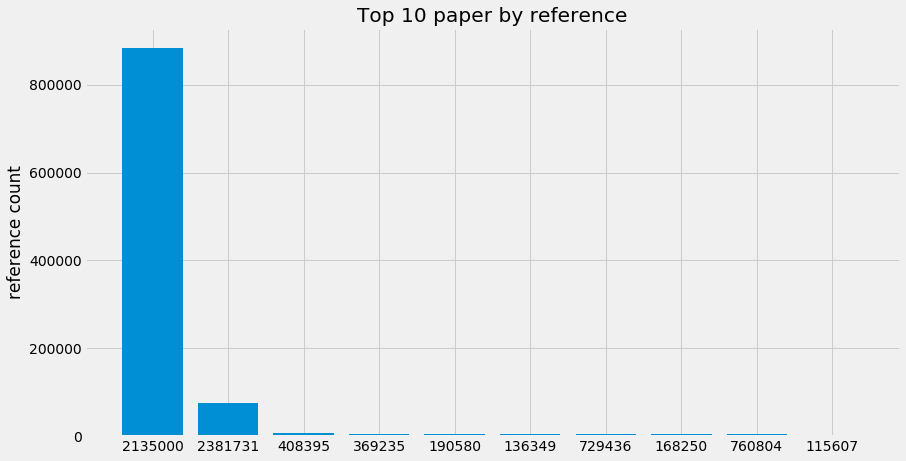

In [28]:
x_values = [row[0] for row in sorted_by_value[:10]]
y_values = [row[1] for row in sorted_by_value[:10]]
x_pos = np.arange(len(x_values))
plt.figure(figsize=(13,7))
plt.bar(x_pos,y_values, align='center', alpha=1)
plt.xticks(x_pos,x_values)
plt.ylabel('reference count')
plt.title('Top 10 paper by reference')
 
plt.show()

In [29]:
print(df.shape)
df.isna().sum()

(976233, 8)


PaperTitle           0
Authors              0
Year                 0
Publication_Venue    0
Index_Id             0
References_Id        0
Abstract             0
count_reference      0
dtype: int64

In [30]:
del reference_count
outlink_map = {}
inlink_map = {}
df_new = df[df["References_Id"].notnull()]
for index, row in df_new.iterrows():
    ref = row["References_Id"]
    ref_list = list(map(int,ref.strip(":").split(":")))
    outlink_map[row["Index_Id"]] = ref_list
    for ref in ref_list:
        listi = inlink_map.get(ref, [])
        listi.append(row["Index_Id"])
        inlink_map[ref] = listi

In [31]:
def calculate_page_rank():
    count = 0
    page_year = {row["Index_Id"]:row["Year"] for _t, row in df.iterrows()}
    year_citation_count = { page_year[index]:0 for index in page_year}
    year_paper_count = { page_year[index]:0 for index in page_year}
    avg_year_citation_count = {}
    for index in page_year:
        year = page_year[index]
        len_outlink = len(outlink_map.get(index, []))
        if len_outlink > 0:
            year_citation_count[year] += len_outlink
            year_paper_count[year] += 1
    for year in year_citation_count:
        if year_paper_count[year] > 0:
            avg_year_citation_count[year] = year_citation_count[year]/year_paper_count[year]
    page_rank = {}
    updated_page_rank = {}
    for index in df["Index_Id"]:
        page_rank[index] = 1
    while True:
        count += 1
        flag = True
        for key in page_rank:
            cs = page_rank[key]
            if key in inlink_map:
                inlink_list = inlink_map[key]
                ns = 0
                for link in inlink_list:
                    if link in page_rank and link in outlink_map:
                        ns += page_rank[link]/len(outlink_map[link])
                #ns = 0.15 + (0.85 * ns)
                ns = 0.15 + float(0.85) * (ns/avg_year_citation_count[page_year[key]])
                if cs != ns:
                    flag = False
                updated_page_rank[key] = ns
        if flag == True:
            print(count)
            break
        page_rank = updated_page_rank
        updated_page_rank = {}
        max_score = max(page_rank.values())
        print(f"max score is {max_score}")
        page_rank = { index:score/max_score for index, score in page_rank.items()}
        return page_rank

In [32]:
page_rank = calculate_page_rank()
#del outlink_map
#del inlink_map

max score is 45.30006518885713


In [33]:
page_rank
print(max(page_rank.values()))
print(sum(page_rank.values()))

1.0
2617.283945650123


In [34]:
df["page_rank"] = 0

In [35]:
def update_rank(row):
    if row["Index_Id"] in page_rank:
        return page_rank[row["Index_Id"]]
    else:
        return 0

In [36]:
df["page_rank"] = df.apply(lambda row: update_rank(row),axis = 1)

In [37]:
df["page_rank"][0:10]

117    0.004683
133    0.005583
134    0.005590
147    0.010586
149    0.003931
315    0.008771
316    0.000000
317    0.007529
318    0.051573
319    0.005276
Name: page_rank, dtype: float64

In [38]:
df.head(5)

,PaperTitle,Authors,Year,Publication_Venue,Index_Id,References_Id,Abstract,count_reference,page_rank
117,Algorithms for trie compaction,"M. Al-Suwaiyel, E Horowitz",1984,ACM Transactions on Database Systems (TODS),118,:1157:252607:287497:289080:408503:326292:32687...,The trie data structure has many properties wh...,12,0.004683
133,"Logical, internal, and physical reference beha...","Wolfgang Effelsberg, Mary E. S. Loomis",1984,ACM Transactions on Database Systems (TODS),134,:286819:287482:287680:287739:287766:287646:317...,This work investigates one aspect of the perfo...,9,0.005583
134,A parallel pipelined relational query processor,"Won Kim, Daniel Gajski, David J. Kuck",1984,ACM Transactions on Database Systems (TODS),135,:287004:287293:287666:287494:317954:321467:322...,This paper presents the design of a relational...,8,0.005590
147,Practical data-swapping: the first steps,Steven P. Reiss,1984,ACM Transactions on Database Systems (TODS),148,:287296:287297:289164:649353:2135000,The problem of statistical database confidenti...,38,0.010586
149,An extension of conflict-free multivalued depe...,Hirofumi Katsuno,1984,ACM Transactions on Database Systems (TODS),150,:287338:287676:289281:289349:289304:289423:374...,"Several researchers (Beeri, Bernstein, Chiu, F...",3,0.003931


In [39]:
df["Number Of Authors"] = 0
def cal_authors(authors):
    return len(authors.split(","))
df["Number Of Authors"] = df["Authors"].apply(lambda val:cal_authors(val))
df["Number Of Authors"].value_counts()

2      299722
3      257046
1      154673
4      145068
5       64730
6       28854
7       12060
8        6066
9        3074
10       1731
11       1039
12        631
13        422
14        312
15        190
16        124
17        102
18         88
19         45
20         43
21         37
22         30
24         21
23         20
26         16
27         14
25         14
29          9
28          8
30          6
31          6
33          3
37          3
38          2
83          2
45          2
42          2
39          2
34          2
32          2
110         1
41          1
36          1
43          1
46          1
50          1
52          1
59          1
63          1
65          1
77          1
115         1
Name: Number Of Authors, dtype: int64

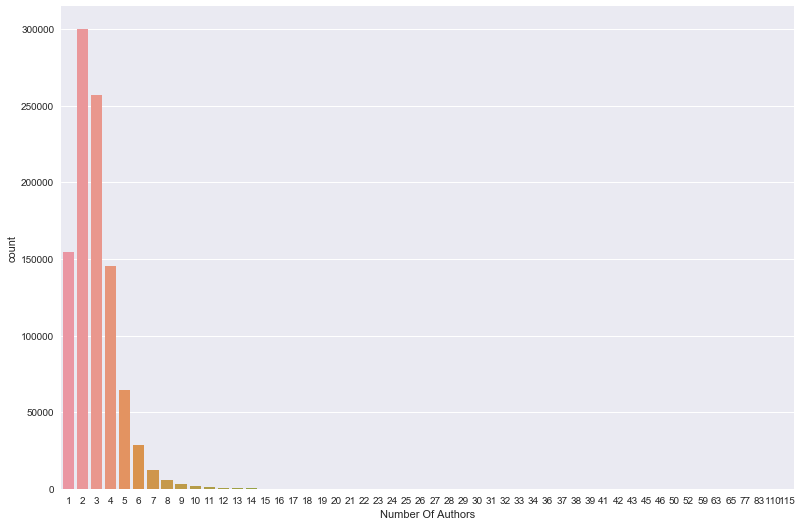

In [40]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
ax = sns.countplot(x="Number Of Authors", data=df)

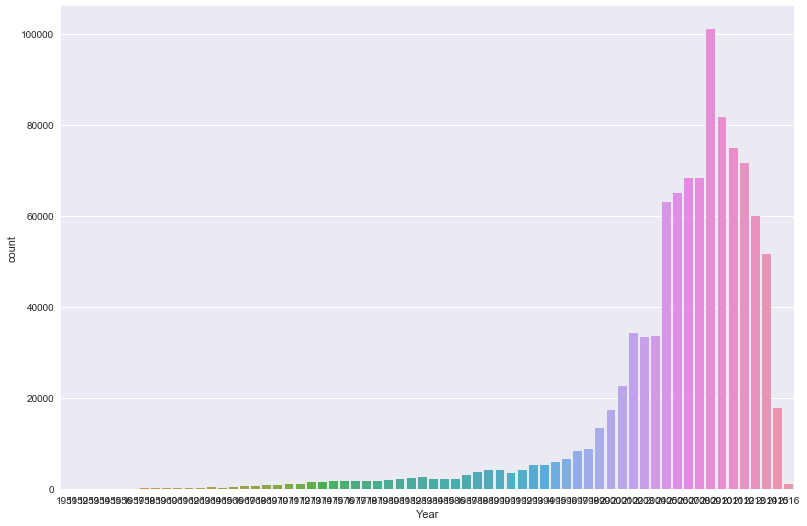

In [41]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
ax = sns.countplot(x="Year", data=df)

In [42]:
import matplotlib.pylab as plt
lists = sorted(year_citation_count.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

NameError: name 'year_citation_count' is not defined

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_vals = list(df_new["Publication_Venue"].values.astype(str))
le.fit(train_vals)
df_new["Publication_Venue"] = le.transform(train_vals)

In [54]:
df["Number Of Authors"].value_counts()

2      299722
3      257046
1      154673
4      145068
5       64730
6       28854
7       12060
8        6066
9        3074
10       1731
11       1039
12        631
13        422
14        312
15        190
16        124
17        102
18         88
19         45
20         43
21         37
22         30
24         21
23         20
26         16
27         14
25         14
29          9
28          8
30          6
31          6
33          3
37          3
38          2
83          2
45          2
42          2
39          2
34          2
32          2
110         1
41          1
36          1
43          1
46          1
50          1
52          1
59          1
63          1
65          1
77          1
115         1
Name: Number Of Authors, dtype: int64

In [56]:
# graph 
adj_list = {}
for key,row in df.iterrows():
    curr_list = adj_list.get(row["Index_Id"], [])
    curr_list.extend(list(map(int,row["References_Id"].strip(":").split(":"))))
    curr_list = list(set(curr_list))
    adj_list[key] = curr_list
adj_list

{117: [688701,
  1157,
  287497,
  326292,
  408503,
  289080,
  2135000,
  326877,
  287326,
  252607],
 133: [287680,
  286819,
  317987,
  323270,
  1825959,
  690249,
  318031,
  319472,
  321685,
  287766,
  407995,
  2135000,
  287482,
  287739,
  482045,
  287646,
  411551],
 134: [317954,
  287494,
  689435,
  287004,
  411679,
  411553,
  599212,
  599214,
  599215,
  287666,
  689976,
  689210,
  321467,
  287293,
  322879,
  599234,
  689860,
  426453,
  2135000,
  607453,
  606177,
  481891],
 147: [287296, 287297, 649353, 289164, 2135000],
 149: [416000,
  289281,
  289349,
  287338,
  289423,
  374000,
  411567,
  598678,
  2135000,
  289304,
  411705,
  287676],
 315: [321968, 2135000, 555374, 764431],
 316: [2135000],
 317: [399234,
  341247,
  287332,
  286855,
  320232,
  287369,
  286830,
  287630,
  374000,
  287729,
  411698,
  534063,
  566099,
  287477,
  2007,
  2135000,
  286972,
  408061,
  322879],
 318: [555361,
  318212,
  320203,
  565837,
  680046,
  4085

In [88]:
# dfs
def reach(n):
    visited = {}
    visited[n] = True
    max_count = -1
    count = 0
    
    if n in adj_list:
        neighbours = adj_list[n]
        for node in neighbours:
            if node not in visited:
                visited[node] = True
#                 print(node,end=" ")
                count = 1+ reach(node)
                if count>max_count:
                    max_count = count
    else:
        return 0
    return max_count

In [96]:
import sys
sys.setrecursionlimit(100000)

In [95]:
sys.getrecursionlimit()

10000

In [ ]:
reach(711)

In [83]:
adj_list[252607]

KeyError: 252607

In [25]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [26]:
df_new = tidy_split(df, 'Authors', sep=',')
df_new.head()

,PaperTitle,Authors,Year,Publication_Venue,Index_Id,References_Id,Abstract,count_reference,page_rank
117,Algorithms for trie compaction,M. Al-Suwaiyel,1984.0,ACM Transactions on Database Systems (TODS),118,:1157:252607:287497:289080:408503:326292:32687...,The trie data structure has many properties wh...,12,0.004683
117,Algorithms for trie compaction,E Horowitz,1984.0,ACM Transactions on Database Systems (TODS),118,:1157:252607:287497:289080:408503:326292:32687...,The trie data structure has many properties wh...,12,0.004683
133,"Logical, internal, and physical reference beha...",Wolfgang Effelsberg,1984.0,ACM Transactions on Database Systems (TODS),134,:286819:287482:287680:287739:287766:287646:317...,This work investigates one aspect of the perfo...,9,0.005583
133,"Logical, internal, and physical reference beha...",Mary E. S. Loomis,1984.0,ACM Transactions on Database Systems (TODS),134,:286819:287482:287680:287739:287766:287646:317...,This work investigates one aspect of the perfo...,9,0.005583
134,A parallel pipelined relational query processor,Won Kim,1984.0,ACM Transactions on Database Systems (TODS),135,:287004:287293:287666:287494:317954:321467:322...,This paper presents the design of a relational...,8,0.005590


In [28]:
#df_new = b
df_new.shape

(2824936, 9)

In [33]:
train_vals = list(df_new["Authors"].values.astype(str))
le.fit(train_vals)
df_new["Authors"] = le.transform(train_vals)

In [ ]:
df_new.to_csv("ranked_processed_acm_1.csv")

In [35]:
df_new.head(5)

,PaperTitle,Authors,Year,Publication_Venue,Index_Id,References_Id,Abstract,count_reference,page_rank
117,Algorithms for trie compaction,207770,1984.0,11564,118,:1157:252607:287497:289080:408503:326292:32687...,The trie data structure has many properties wh...,12,0.004683
117,Algorithms for trie compaction,218707,1984.0,11564,118,:1157:252607:287497:289080:408503:326292:32687...,The trie data structure has many properties wh...,12,0.004683
133,"Logical, internal, and physical reference beha...",84699,1984.0,11564,134,:286819:287482:287680:287739:287766:287646:317...,This work investigates one aspect of the perfo...,9,0.005583
133,"Logical, internal, and physical reference beha...",558533,1984.0,11564,134,:286819:287482:287680:287739:287766:287646:317...,This work investigates one aspect of the perfo...,9,0.005583
134,A parallel pipelined relational query processor,88995,1984.0,11564,135,:287004:287293:287666:287494:317954:321467:322...,This paper presents the design of a relational...,8,0.005590


In [ ]:
num_columns= ["Year","Publication_Venue","Index_Id","count_reference","Number Of Authors"]
df_train = df[num_columns]

In [ ]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(df_train, df["page_rank"], test_size=0.25, random_state=20)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)
print(reg.coef_)

In [ ]:
from sklearn import metrics
pred_y = reg.predict(valid_x)
rmse_initial = np.sqrt(metrics.mean_squared_error(pred_y,valid_y))
print(rmse_initial)